<div style="color:white;
           display:fill;
           border-radius:16px;
           background-color:#484E51;
           font-size:140%;
           font-family:Alternate Gothic;
           letter-spacing:0.4px">

<p style="padding: 10px;
              color:White;
          text-align: center;
          font-size:120%;">
🚘⛽ Vehicle Fuel Consumption Prediction ⛽🚘

</p>
</div>  

<img src="https://media.giphy.com/media/l2R0e9y6A304JkFOg/source.gif"> 

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#484E51; color:white; font-family:Alternate Gothic;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Missing Values<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Exploratory Data Analysis<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#11" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Outliers<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#12" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Feature Engineering<span class="badge badge-primary badge-pill">6</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#16" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Preprocessing<span class="badge badge-primary badge-pill">7</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#19" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">KNN Regression<span class="badge badge-primary badge-pill">8</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#26" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Linear Regression<span class="badge badge-primary badge-pill">9</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#20" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Ridge Regression<span class="badge badge-primary badge-pill">10</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#21" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Lasso Regression<span class="badge badge-primary badge-pill">11</span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#22" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">ElasticNet<span class="badge badge-primary badge-pill">12</span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#24" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">XGBoost<span class="badge badge-primary badge-pill">13</span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#25" role="tab" aria-controls="settings" target="_self" style = "color:#484E51; font-family:Alternate Gothic;">Averaging Models<span class="badge badge-primary badge-pill">14</span></a>


</div>
</div>
</div>

<a id = "1"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Libraries and Utilities

In [17]:
#!pip install plotly

In [18]:
#!pip install chart_studio

In [19]:
#!pip install cufflinks

In [20]:
import pandas as pd
#from pandas_profiling import ProfileReport
import pandas_profiling
import numpy as np
import re
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib import colors
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go

from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.base import  clone

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('../data/processed'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/processed\.gitkeep
../data/processed\archive.zip
../data/processed\auto-mpg.csv
../data/processed\auto-mpg_uct.csv
../data/processed\kidney_disease.csv


<a id = "2"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Load and Check Data

In [21]:
ad = pd.read_csv('../data/processed/auto-mpg.csv',
                 na_values = "?")
data = ad.copy()

car_name = []
car_brand = []

for i in data["car name"]:
    if i.split()[0] == "chevroelt":
        i = i.replace("chevroelt","chevrolet")
        
    if i.split()[0] ==("vokswagen"):
        i = i.replace("vokswagen","volkswagen")
        
    if i.split()[0] ==("vw"):
        i = i.replace("vw","volkswagen")
        
    if i.split()[0] ==("hi"):
        i = i.replace("hi","international-harvester")
        
    if i.split()[0] == "maxda":
        i = i.replace("maxda","mazda")
        
    if i.split()[0] == "mercedes-benz":
        i = i.replace("mercedes-benz","mercedes")
        
    car_brand.append(i.split()[0])
    
    car_name.append(i.split(None ,1)[1:])
    
dic = {'car_brand': car_brand,
       'car_name': car_name,
       'cylinders': data["cylinders"],
       'displacement': data["displacement"],
       'horsepower': data["horsepower"],
       'weight': data["weight"],
       'acceleration': data["acceleration"],
      'model year': data["model year"],
      'origin': data["origin"],
      'mpg': data["mpg"]}

data = pd.DataFrame(dic)
data["car_name"] = data["car_name"].astype(str)

data.loc[data.car_name.notna().index,'car_name'] = data.car_name[data.car_name.notna()].apply(lambda x: re.sub('[\W_]+','',x))

data2 = data.copy()
data3 = data.copy()
data4 = data.copy()

data.head(10)

car_brand        car_name  cylinders  displacement  horsepower  weight  \
0  chevrolet  chevellemalibu          8         307.0       130.0    3504   
1      buick      skylark320          8         350.0       165.0    3693   
2   plymouth       satellite          8         318.0       150.0    3436   
3        amc        rebelsst          8         304.0       150.0    3433   
4       ford          torino          8         302.0       140.0    3449   
5       ford      galaxie500          8         429.0       198.0    4341   
6  chevrolet          impala          8         454.0       220.0    4354   
7   plymouth         furyiii          8         440.0       215.0    4312   
8    pontiac        catalina          8         455.0       225.0    4425   
9        amc   ambassadordpl          8         390.0       190.0    3850   

   acceleration  model year  origin   mpg  
0          12.0          70       1  18.0  
1          11.5          70       1  15.0  
2          11.0          70       1  18.0  
3          12.0          70       1  16.0  
4          10.5          70       1  17.0  
5          10.0          70       1  15.0  
6           9.0          70       1  14.0  
7           8.5          70       1  14.0  
8          10.0          70       1  14.0  
9           8.5          70       1  15.0

In [22]:
print("Data Shape: ",data.shape)

Data Shape:  (398, 10)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     398 non-null    object 
 1   car_name      398 non-null    object 
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model year    398 non-null    int64  
 8   origin        398 non-null    int64  
 9   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [24]:
data.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
describe = data.describe()
describe.T

count         mean         std     min       25%     50%  \
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   

                   75%     max  
cylinders        8.000     8.0  
displacement   262.000   455.0  
horsepower     126.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0  
origin           2.000     3.0  
mpg             29.000    46.6

<a id = "3"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Missing Values

In [26]:
print(data.isna().sum())

car_brand       0
car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64


In [27]:
null_data = data[data.isnull().any(axis=1)]
null_data

car_brand      car_name  cylinders  displacement  horsepower  weight  \
32       ford         pinto          4          98.0         NaN    2046   
126      ford      maverick          6         200.0         NaN    2875   
330   renault   lecardeluxe          4          85.0         NaN    1835   
336      ford  mustangcobra          4         140.0         NaN    2905   
354   renault           18i          4         100.0         NaN    2320   
374       amc     concorddl          4         151.0         NaN    3035   

     acceleration  model year  origin   mpg  
32           19.0          71       1  25.0  
126          17.0          74       1  21.0  
330          17.3          80       2  40.9  
336          14.3          80       1  23.6  
354          15.8          81       2  34.5  
374          20.5          82       1  23.0

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Predict Missing Values with Multiple Linear Regression

Prediction 1
[60.65127981]
---------------
Prediction 2
[95.39307874]
---------------
Prediction 3
[55.78650175]
---------------
Prediction 4
[97.74968539]
---------------
Prediction 5
[75.2317701]
---------------
Prediction 6
[73.33318938]
---------------
Missing Values: 0


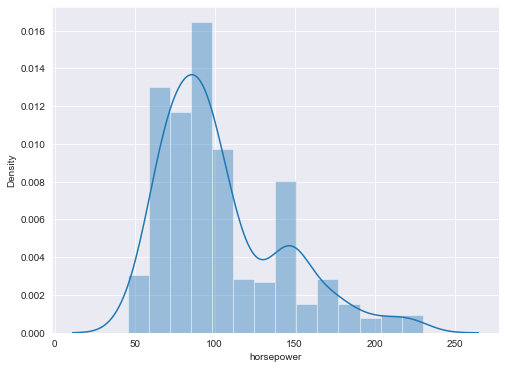

In [28]:
#data['horsepower'] = data['horsepower'].fillna(data.groupby('car_brand')['horsepower'].transform('mean'))

data2 = data2.dropna()
x = data2.drop(["car_brand","car_name","horsepower"], axis = 1)
y = data2.horsepower
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size  = test_size,
                                                    random_state = 42)

lr = LinearRegression()
lr.fit(X_train,Y_train)

null_data2 = null_data.copy()
null_data2 = null_data2.drop("horsepower", axis = 1)
null_data2 = null_data2.drop("car_brand", axis = 1)
null_data2 = null_data2.drop("car_name", axis = 1)

predictions = []
for i in range(null_data2.shape[0]):
    predictions.append(null_data2.iloc[i,:])

values = []
for i in range(len(predictions)):
    for j in range(null_data2.shape[1]):
        values.append(predictions[i][j])
i = 0
j = null_data2.shape[1]
lr_predictions =[]
for a in range(0,null_data2.shape[0]):
    print("Prediction {}".format(a+1))
    print(lr.predict((np.array([values[i:j]]))))
    lr_predictions.append(lr.predict((np.array([values[i:j]])))[0])
    print("---------------")
    i = i+(int(len(values) / len(predictions)))
    j = j+(int(len(values) / len(predictions)))
    
null_index = data[data["horsepower"].isna()].index
for i in range(0,6):
    data["horsepower"][null_index[i]] = lr_predictions[i]
print("Missing Values: {}".format(data.isnull().sum().sum()))
    
    
plt.figure(figsize = (8,6))
sns.distplot(data.horsepower)
plt.show()

In [29]:
data.head()

car_brand        car_name  cylinders  displacement  horsepower  weight  \
0  chevrolet  chevellemalibu          8         307.0       130.0    3504   
1      buick      skylark320          8         350.0       165.0    3693   
2   plymouth       satellite          8         318.0       150.0    3436   
3        amc        rebelsst          8         304.0       150.0    3433   
4       ford          torino          8         302.0       140.0    3449   

   acceleration  model year  origin   mpg  
0          12.0          70       1  18.0  
1          11.5          70       1  15.0  
2          11.0          70       1  18.0  
3          12.0          70       1  16.0  
4          10.5          70       1  17.0

<img src="https://media.giphy.com/media/6swcfDQHr3UTm/giphy.gif">

<a id = "4"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Exploratory Data Analysis

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Displacement - Weight - Origin

In [30]:
origin_1 = data3[data3.origin == 1]
origin_2 = data3[data3.origin == 2]
origin_3 = data3[data3.origin == 3]
trace11 =go.Scatter(y = origin_1.weight,x = origin_1.displacement,mode = "markers",name = "Origin: 1",marker = dict(color = 'rgba(245, 10, 71, 0.8)'),text= origin_1.origin)
trace12 =go.Scatter(y = origin_2.weight,x = origin_2.displacement,mode = "markers",name = "Origin: 2",marker = dict(color = 'rgba(46, 245, 10, 0.8)'),text= origin_2.origin)
trace13 =go.Scatter(y = origin_3.weight,x = origin_3.displacement,mode = "markers",name = "Origin: 3",marker = dict(color = 'rgba(128, 10, 245, 0.8)'),text= origin_3.origin)
scatter_data_1 = [trace11, trace12, trace13]
layout1 = dict(title = 'Displacement - Weight - Origin',xaxis= dict(title= 'Displacement',ticklen= 5,zeroline= False),yaxis= dict(title= 'Weight',ticklen= 5,zeroline= False),autosize=False,width=700,height=450,template='plotly_dark')
fig1 = dict(data = scatter_data_1, layout = layout1)
iplot(fig1)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Horsepower - MPG - Cylinders

In [31]:
cyl_3 = data4[data4.cylinders == 3]
cyl_4 = data4[data4.cylinders == 4]
cyl_5 = data4[data4.cylinders == 5]
cyl_6 = data4[data4.cylinders == 6]
cyl_8 = data4[data4.cylinders == 8]
trace21 =go.Scatter(y = cyl_3.horsepower,x = cyl_3.mpg,mode = "markers",name = "Cylinders: 3",marker = dict(color = 'rgba(229, 21, 213, 0.8)'),text= cyl_3.cylinders)
trace22 =go.Scatter(y = cyl_4.horsepower,x = cyl_4.mpg,mode = "markers",name = "Cylinders: 4",marker = dict(color = 'rgba(33, 158, 220, 0.8)'),text= cyl_4.cylinders)
trace23 =go.Scatter(y = cyl_5.horsepower,x = cyl_5.mpg,mode = "markers",name = "Cylinders: 5",marker = dict(color = 'rgba(242, 245, 10, 0.8)'),text= cyl_5.cylinders)
trace24 =go.Scatter(y = cyl_6.horsepower,x = cyl_6.mpg,mode = "markers",name = "Cylinders: 6",marker = dict(color = 'rgba(16, 235, 35, 0.8)'),text= cyl_6.cylinders) 
trace25 =go.Scatter(y = cyl_8.horsepower,x = cyl_8.mpg,mode = "markers",name = "Cylinders: 8",marker = dict(color = 'rgba(235, 16, 16, 0.8)'),text= cyl_8.cylinders) 
scatter_data_2 = [trace21, trace22, trace23, trace24, trace25]
layout2 = dict(title = 'Horsepower - MPG - Cylinders',xaxis= dict(title= 'MPG',ticklen= 5,zeroline= False),yaxis= dict(title= 'Horsepower',ticklen= 5,zeroline= False),autosize=False,width=700,height=450,template='plotly_dark')
fig2 = dict(data = scatter_data_2, layout = layout2)
iplot(fig2)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Horsepower - MPG - Displacement - Weight 

In [32]:
fig = px.scatter_3d(data, x = 'mpg', y ='horsepower',z = 'displacement',color = 'weight', opacity = 0.7,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
TOP 10 Horsepower

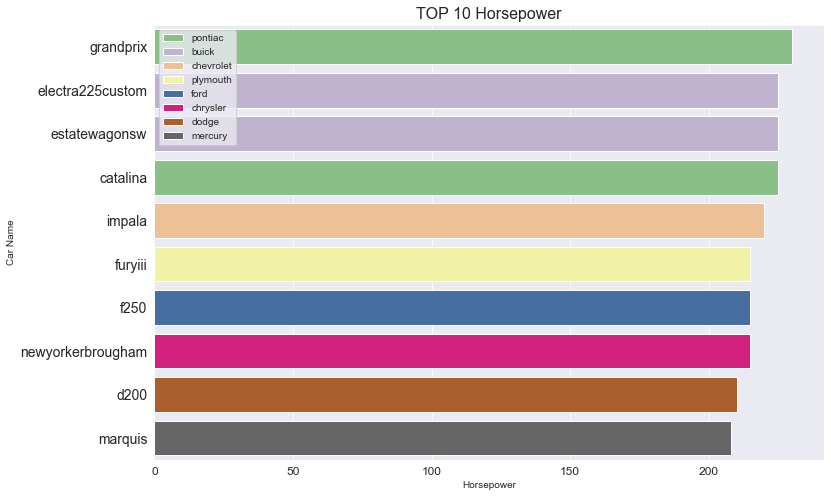

In [33]:
top10_horsepower = {'Car Name': data["car_name"],'Horsepower': data["horsepower"],'Car Brand': data["car_brand"] }
top10_horsepower = pd.DataFrame(top10_horsepower)
top10_horsepower = top10_horsepower[["Car Name","Horsepower","Car Brand"]].sort_values(by = "Horsepower",ascending = False)[0:10]
plt.figure(figsize = (12,8))
plt.title("TOP 10 Horsepower", size = 16)
sns.barplot(x = "Horsepower", y = "Car Name",hue = "Car Brand", data = top10_horsepower,dodge = False, palette = "Accent")
plt.legend(loc = 'upper left')
plt.yticks(size = 14)
plt.xticks(size = 12)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
TOP 10 Weight

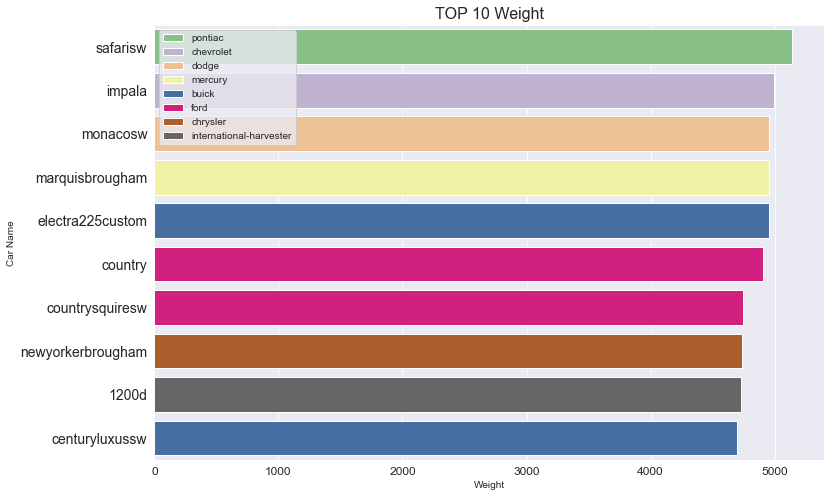

In [34]:
top10_weight = {'Car Name': data["car_name"],'Weight': data["weight"],'Car Brand': data["car_brand"] }
top10_weight = pd.DataFrame(top10_weight)
top10_weight = top10_weight[["Car Name","Weight","Car Brand"]].sort_values(by = "Weight",ascending = False)[0:10]
plt.figure(figsize = (12,8))
plt.title("TOP 10 Weight", size = 16)
sns.barplot(x = "Weight", y = "Car Name",hue = "Car Brand", data = top10_weight,dodge = False, palette = "Accent")
plt.legend(loc = 'upper left')
plt.yticks(size = 14)
plt.xticks(size = 12)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Origin and Cylinders

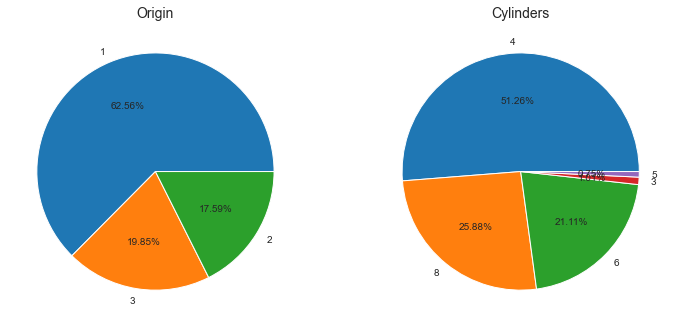

In [35]:
ori = data["origin"].value_counts()
cyl = data["cylinders"].value_counts()
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x= ori, autopct="%.2f%%", labels=ori.keys(), pctdistance=0.6)
plt.title('Origin', size = 14)
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x =cyl,autopct="%.2f%%", labels=cyl.keys(), pctdistance=0.6)
plt.title('Cylinders', size = 14)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Origin - Cylinders - MPG

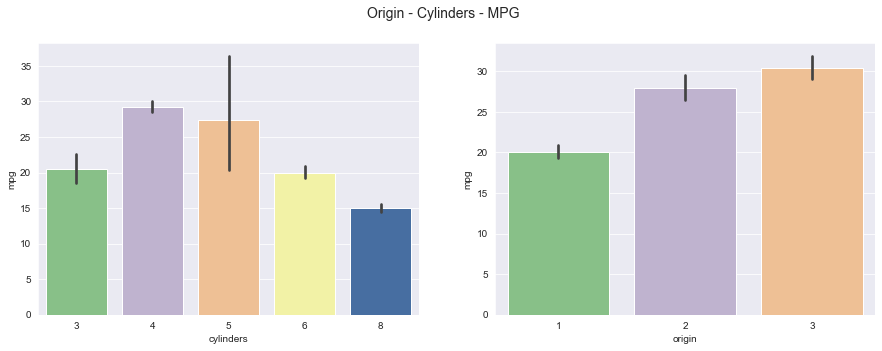

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Origin - Cylinders - MPG', size = 14)
sns.barplot(ax=axes[0], x = data["cylinders"],y = data3["mpg"], palette = "Accent")
sns.barplot(ax=axes[1], x = data["origin"],y = data3["mpg"], palette = "Accent")
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
MPG

In [37]:
fig = px.histogram(data,x = 'mpg',title = 'MPG',marginal = 'violin',color_discrete_sequence = ['red'])
fig.update_layout(xaxis_title_text = 'MPG',yaxis_title_text = 'Frequency',bargap = 0.2, showlegend = False,autosize=False,width=700,height=450,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Horsepower

In [38]:
fig = px.histogram(data,x = 'horsepower',title = 'Horsepower',marginal = 'violin',color_discrete_sequence = ['darkorange'])
fig.update_layout(xaxis_title_text = 'Horsepower',yaxis_title_text = 'Frequency',bargap = 0.2, showlegend = False,autosize=False,width=700,height=450,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Weight

In [39]:
fig = px.histogram(data,x = 'weight',title = 'Weight',marginal = 'violin',color_discrete_sequence = ['darkviolet'])
fig.update_layout(xaxis_title_text = 'weight',yaxis_title_text = 'Frequency',bargap = 0.2, showlegend = False,autosize=False,width=700,height=450,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Displacement

In [40]:
fig = px.histogram(data,x = 'displacement',title = 'Displacement',marginal = 'violin',color_discrete_sequence = ['mediumspringgreen'])
fig.update_layout(xaxis_title_text = 'Displacement',yaxis_title_text = 'Frequency',bargap = 0.2, showlegend = False,autosize=False,width=700,height=450,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Acceleration

In [41]:
fig = px.histogram(data,x = 'acceleration',title = 'Acceleration',marginal = 'violin',color_discrete_sequence = ['gold'])
fig.update_layout(xaxis_title_text = 'Acceleration',yaxis_title_text = 'Frequency',bargap = 0.2, showlegend = False,autosize=False,width=700,height=450,template='plotly_dark')
iplot(fig)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Correlation Map

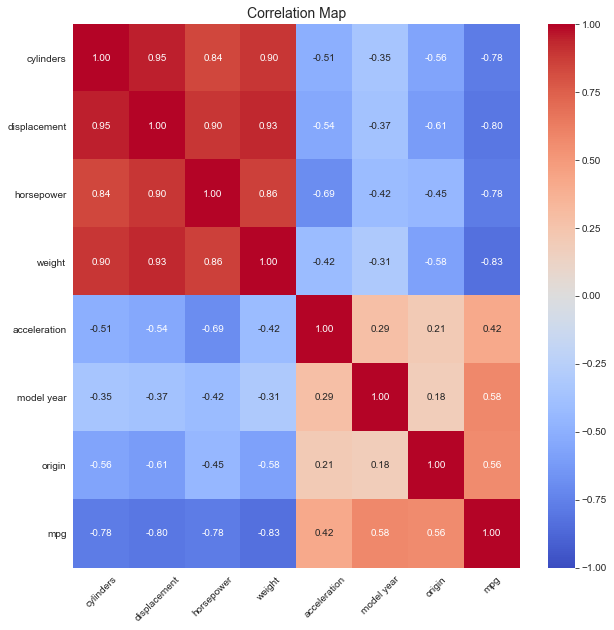

In [42]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot= True,fmt = ".2f",cmap = "coolwarm",vmin = -1,vmax = 1,ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Pairwise Relationships

<Figure size 432x288 with 0 Axes>

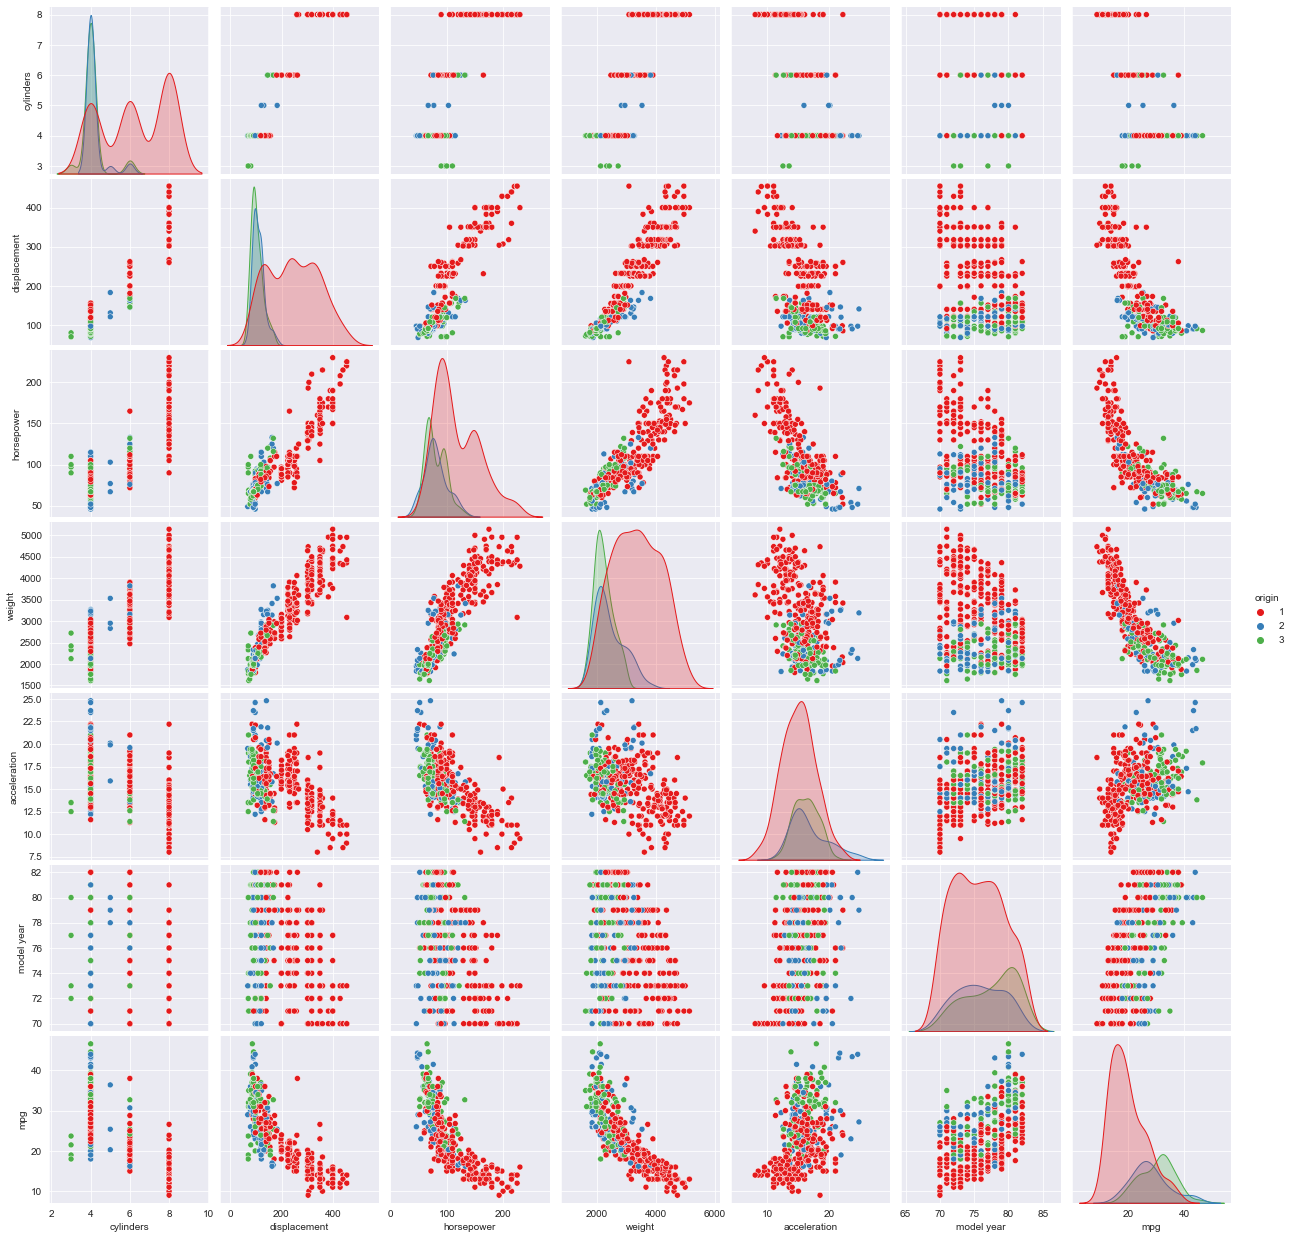

In [43]:
plt.figure()
sns.pairplot(data, diag_kind = "kde",hue = "origin",kind = "scatter",palette = "Set1")
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Vehicle Stats by Origin

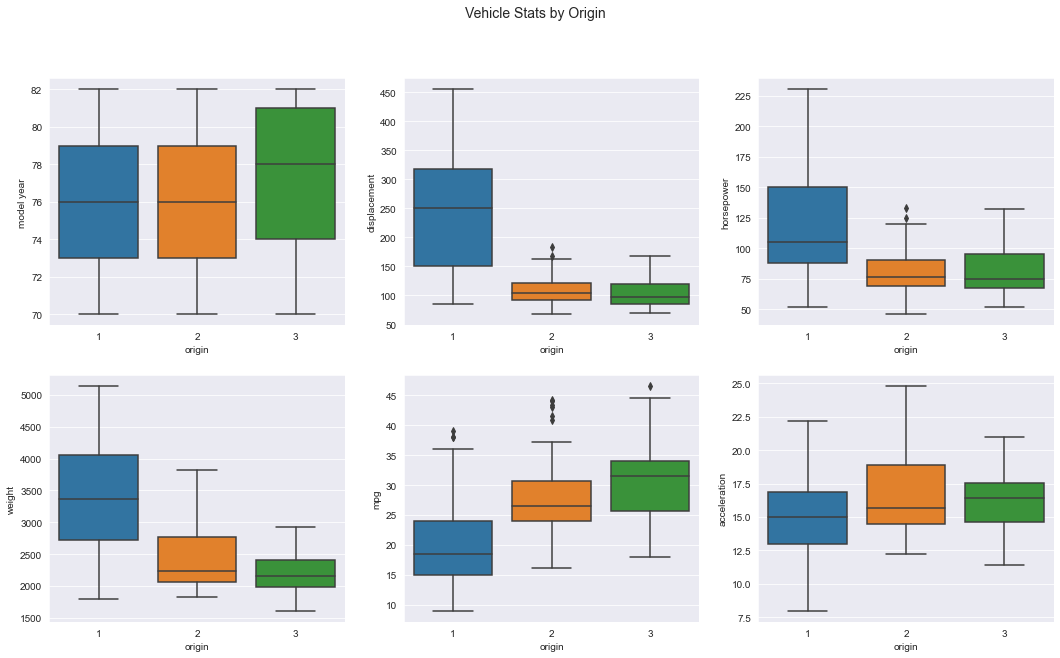

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Vehicle Stats by Origin', size = 14)

sns.boxplot(ax=axes[0, 0], data=data,
            x = 'origin', y='model year')
sns.boxplot(ax=axes[0, 1], data=data,
            x = 'origin', y='displacement')
sns.boxplot(ax=axes[0, 2], data=data,
            x = 'origin', y='horsepower')
sns.boxplot(ax=axes[1, 0], data=data,
            x = 'origin', y='weight')
sns.boxplot(ax=axes[1, 1], data=data,
            x = 'origin', y='mpg')
sns.boxplot(ax=axes[1, 2], data=data,
            x = 'origin', y='acceleration')
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Vehicle Stats by Cylinders

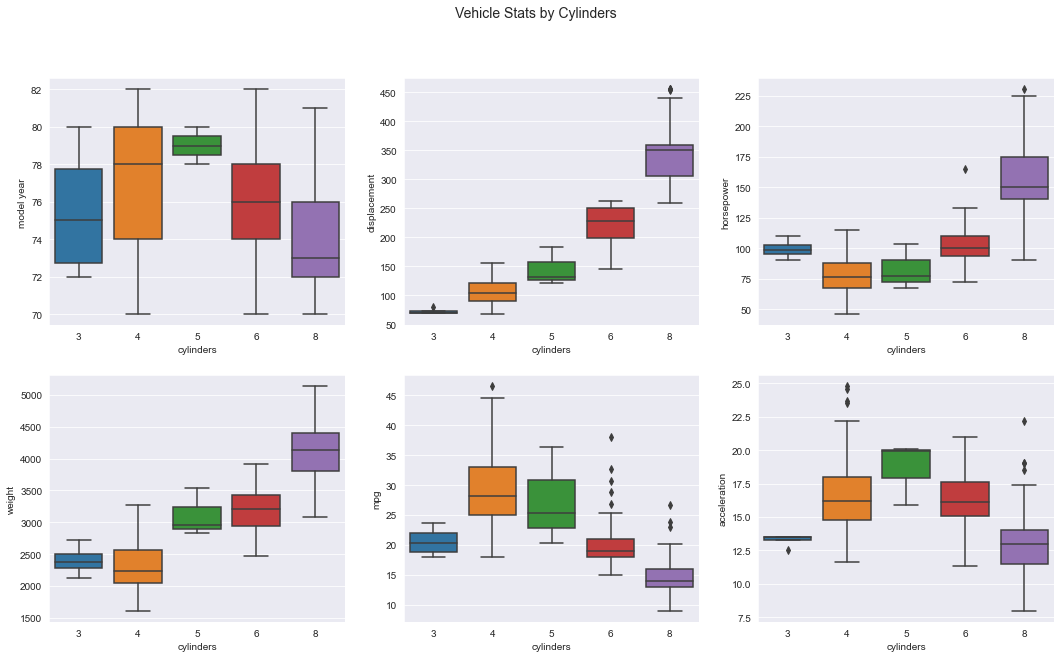

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Vehicle Stats by Cylinders', size = 14)

sns.boxplot(ax=axes[0, 0], data=data,
            x = 'cylinders', y='model year')
sns.boxplot(ax=axes[0, 1], data=data,
            x = 'cylinders', y='displacement')
sns.boxplot(ax=axes[0, 2], data=data,
            x = 'cylinders', y='horsepower')
sns.boxplot(ax=axes[1, 0], data=data,
            x = 'cylinders', y='weight')
sns.boxplot(ax=axes[1, 1], data=data,
            x = 'cylinders', y='mpg')
sns.boxplot(ax=axes[1, 2], data=data,
            x = 'cylinders', y='acceleration')
plt.show()

<img src="https://media.giphy.com/media/sDCma70RplcNG/giphy.gif">


<a id = "11"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Outliers

In [46]:
data.shape

(398, 10)

In [47]:
horsepower_desc = describe["horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [48]:
thr = 2

q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]

IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["horsepower"]
filter_hp_top = data["horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

data = data[filter_hp]

In [49]:
acceleration_desc = describe["acceleration"]
acceleration_desc

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [50]:
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]

IQR_acc = q3_acc - q1_acc

top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["acceleration"]
filter_acc_top = data["acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc]

data.shape

(395, 10)

<a id = "12"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Feature Engineering

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
MPG (Dependent Variable)

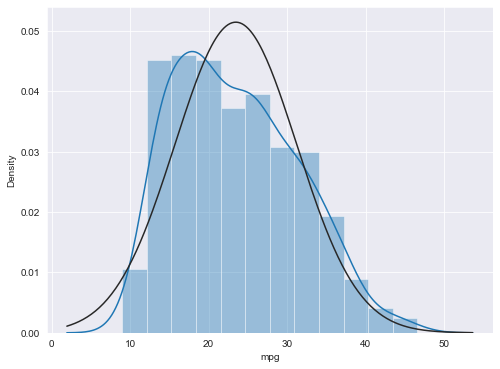

In [51]:
plt.figure(figsize = (8,6))
sns.distplot(data.mpg, fit= norm)
plt.show()

In [52]:
(mu, sigma) = norm.fit(data["mpg"])
print("mu: {} sigma = {}".format(mu, sigma))

mu: 23.472405063291134 sigma = 7.756119546409932


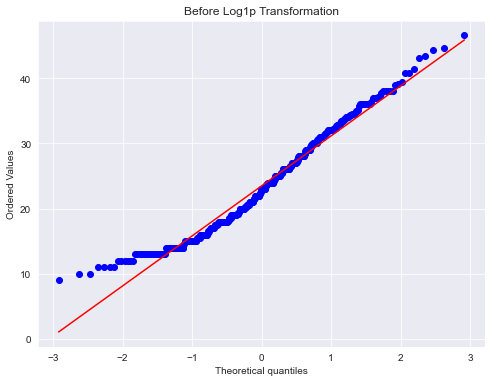

In [53]:
fig = plt.figure(figsize = (8,6))
stats.probplot(data["mpg"], plot = plt)
plt.title("Before Log1p Transformation", size = 12)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Log1p Transformation
    
$$\Huge y_i = {\log_e (x_i+1)} $$
    
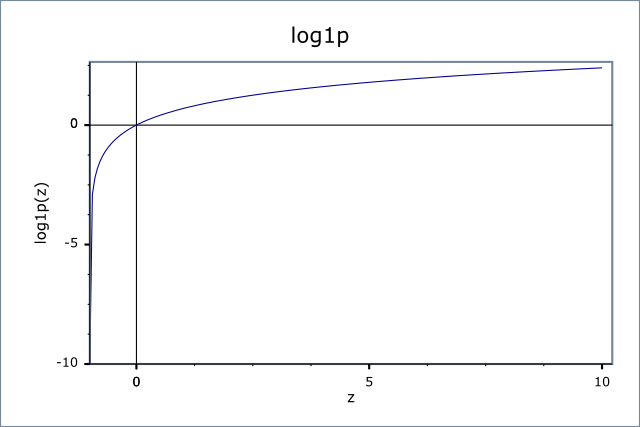

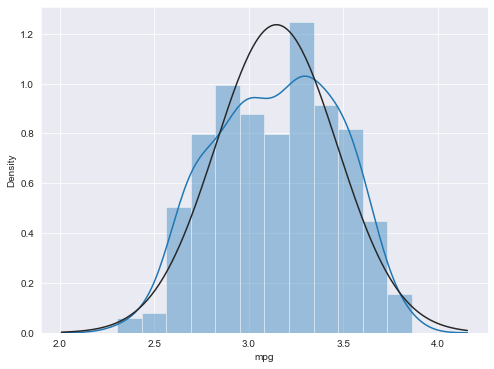

In [54]:
plt.figure(figsize = (8,6))
data["mpg"] = np.log1p(data["mpg"])
sns.distplot(data.mpg, fit= norm)
plt.show()

In [55]:
(mu, sigma) = norm.fit(data["mpg"])
print("mu: {} sigma = {}".format(mu, sigma))

mu: 3.146474056830183 sigma = 0.3227569103044823


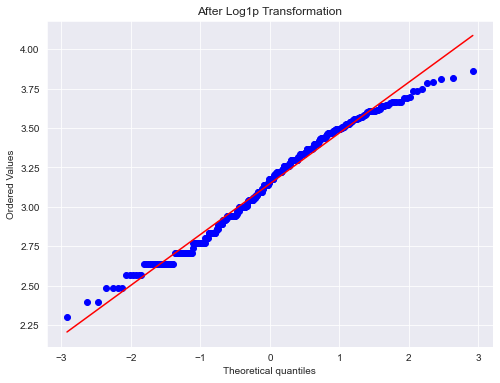

In [56]:
fig = plt.figure(figsize = (8,6))
stats.probplot(data["mpg"], plot = plt)
plt.title("After Log1p Transformation", size = 12)
plt.show()

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Independet Variables

In [57]:
data = data.drop(["car_brand","car_name"], axis = 1)
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])

def coloring_bg(s, min_, max_, cmap='Reds', low=0, high=0):
    rng = max_ - min_
    norm = colors.Normalize(min_ - (rng * low),
                            max_ + (rng * high))
    normed = norm(s.values)    
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

skewness.style.apply(coloring_bg,min_=skewness.min().min(),max_=skewness.max().max(),low=-0,high=1)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
One Hot Encoding

In [58]:
data["cylinders"] =  data["cylinders"].astype(str)
data["origin"] = data["origin"].astype(str)

data = pd.get_dummies(data)
data.head()

displacement  horsepower  weight  acceleration  model year       mpg  \
0         307.0       130.0    3504          12.0          70  2.944439   
1         350.0       165.0    3693          11.5          70  2.772589   
2         318.0       150.0    3436          11.0          70  2.944439   
3         304.0       150.0    3433          12.0          70  2.833213   
4         302.0       140.0    3449          10.5          70  2.890372   

   cylinders_3  cylinders_4  cylinders_5  cylinders_6  cylinders_8  origin_1  \
0            0            0            0            0            1         1   
1            0            0            0            0            1         1   
2            0            0            0            0            1         1   
3            0            0            0            0            1         1   
4            0            0            0            0            1         1   

   origin_2  origin_3  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

<a id = "16"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Preprocessing

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Train Test Split

In [59]:
x = data.drop(["mpg"], axis = 1)
y = data.mpg
x.head()

displacement  horsepower  weight  acceleration  model year  cylinders_3  \
0         307.0       130.0    3504          12.0          70            0   
1         350.0       165.0    3693          11.5          70            0   
2         318.0       150.0    3436          11.0          70            0   
3         304.0       150.0    3433          12.0          70            0   
4         302.0       140.0    3449          10.5          70            0   

   cylinders_4  cylinders_5  cylinders_6  cylinders_8  origin_1  origin_2  \
0            0            0            0            1         1         0   
1            0            0            0            1         1         0   
2            0            0            0            1         1         0   
3            0            0            0            1         1         0   
4            0            0            0            1         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

In [60]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size  = test_size, random_state = 42)

<span style="color:#484E51;
             font-size:160%;
             font-family:Alternate Gothic;">
Standardization

In [61]:
scaler = RobustScaler() #RobustScaler - StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<img src="https://media.giphy.com/media/J1YcBgUveXNkY/giphy.gif">

<a id = "19"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
KNN Regression

In [62]:
knn_reg = KNeighborsRegressor(n_neighbors = 5,
                              weights ='uniform',
                              metric = 'minkowski',
                              algorithm = 'auto')

knn_reg.fit(X_train,Y_train)

y_predicted_dummy = knn_reg.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("KNN Regression MSE:", mse)

KNN Regression MSE: 0.01566659037073733


In [63]:
n_folds = 10
knn_reg_grid_params = {'n_neighbors': [3,4,5,6,7,11,13,15,19,45,64],
                      'weights': ['uniform', 'distance'],
                      'metric': ['minkowski','euclidean','manhattan'],
                      'algorithm':['auto', 'kd_tree']}

knn_reg_grid = GridSearchCV(knn_reg,
                            knn_reg_grid_params,
                            cv = n_folds,
                            verbose = 2,
                            n_jobs = -1)

knn_reg_grid.fit(X_train, Y_train)

y_predicted_dummy = knn_reg_grid.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Tuned KNN Reg MSE:", mse)

Fitting 10 folds for each of 132 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Tuned KNN Reg MSE: 0.013263502881060573


[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:    0.6s finished


<a id = "26"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Linear Regression

In [64]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

print("LR Coef:", lr.coef_)

y_predicted_dummy = lr.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE:", mse)

LR Coef: [ 0.10471706 -0.12941317 -0.27457903 -0.02119851  0.15487731 -0.16091022
  0.1038104   0.13126925 -0.04318574 -0.03098369 -0.03819983 -0.00490931
  0.04310914]
Linear Regression MSE: 0.012800924255530402


<a id = "20"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Ridge Regression

Ridge Coef: [ 0.08967487 -0.12941529 -0.26563511 -0.02182056  0.15427268 -0.15141409
  0.10444123  0.11226233 -0.04011008 -0.02517938 -0.03742052 -0.00481828
  0.0422388 ]
Ridge Best Estimator: Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, random_state=42, solver='auto',
      tol=0.001)
Ridge MSE: 0.012822685130308643
--------------------------------------


Text(0.5, 1.0, 'Ridge')

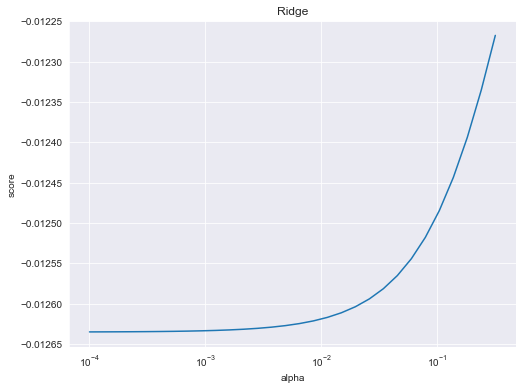

In [65]:
ridge = Ridge(random_state = 42, max_iter = 10000)

alphas = np.logspace(-4,-0.5,30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters,
                   cv = n_folds, scoring= "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef:", clf.best_estimator_.coef_)

ridge = clf.best_estimator_

print("Ridge Best Estimator:", ridge)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)

print("Ridge MSE:", mse)
print("--------------------------------------")

plt.figure(figsize = (8,6))
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

<a id = "21"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Lasso Regression

Lasso Coef: [ 0.         -0.09899388 -0.24648498 -0.01319007  0.15254622 -0.0605537
  0.10141287  0.         -0.02043308  0.         -0.02090237  0.
  0.02921662]
Lasso Best Estimator: Lasso(alpha=0.0016102620275609393, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
Lasso MSE: 0.013048078934795456
--------------------------------------


Text(0.5, 1.0, 'Lasso')

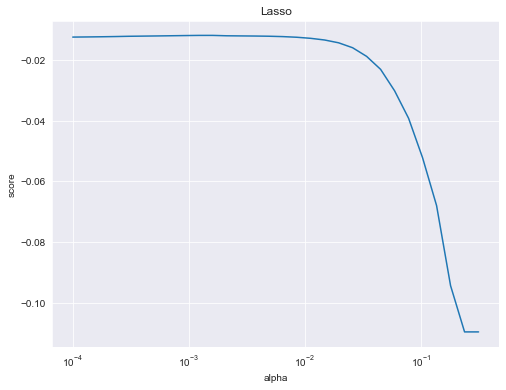

In [66]:
lasso = Lasso(random_state = 42, max_iter = 10000)

tuned_parameters = [{'alpha':alphas}]

clf = GridSearchCV(lasso, tuned_parameters,
                   cv = n_folds, scoring= "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Lasso Coef:", clf.best_estimator_.coef_)

lasso = clf.best_estimator_

print("Lasso Best Estimator:", lasso)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)

print("Lasso MSE:", mse)
print("--------------------------------------")

plt.figure(figsize = (8,6))
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")



<a id = "22"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
ElasticNet

In [67]:
parametersGrid = {'alpha':alphas,
                    "l1_ratio": np.arange(0.0,1.0,0.05)}

eNet = ElasticNet(random_state = 42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv = n_folds,
                   scoring= "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)

print("ElasticNet Coef:", clf.best_estimator_.coef_)
print("ElasticNet Best Estimator:", clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("ElasticNet MSE:", mse)


ElasticNet Coef: [ 0.00702421 -0.12250147 -0.22247232 -0.02216065  0.14997647 -0.0954683
  0.10351066  0.02887377 -0.02643886 -0.         -0.02674464 -0.
  0.03961606]
ElasticNet Best Estimator: ElasticNet(alpha=0.008531678524172814, copy_X=True, fit_intercept=True,
           l1_ratio=0.05, max_iter=10000, normalize=False, positive=False,
           precompute=False, random_state=42, selection='cyclic', tol=0.0001,
           warm_start=False)
ElasticNet MSE: 0.013077072711333635


<a id = "24"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
XGBoost

In [68]:
parametersGrid  = {'nthread': [4],
                  'objective': ['reg:linear'],
                    'learning_rate':[0.03,0.05,0.07],
                  'max_depth': [5,6,7],
                  'min_child_weight': [4],
                  'silent': [1],
                  'subsample': [0.7],
                  'colsample_bytree': [0.7],
                  'n_estimators':[500,1000]}

model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds,
                   scoring= "neg_mean_squared_error", refit = True)


clf.fit(X_train, Y_train)
model_xgb = clf.best_estimator_

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(Y_test,y_predicted_dummy)

print("XGBRegressor MSE:", mse)

[09:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost

<a id = "25"></a>
<span style="color:#484E51;
             font-size:220%;
             font-family:Alternate Gothic;">
Averaging Models

In [69]:
class AveragingModels():  
    def __init__(self, models):
        self.models = models
        
    def fit(self, X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)
    
averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, Y_train)

y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Averaged Models MSE:", mse)

[09:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Averaged Models MSE: 0.010216210230609686
